La idea de este play ground es explorar la información de algunos dataset de este link:https://exoplanetarchive.ipac.caltech.edu/bulk_data_download/?fbclid=IwAR1GDR1g9FTuhdx1K7oOGO0Vh0I3QFGDyTSwOF15rF0hLnZuznXaj86XEr0

para asi ver cuales sirve y cuales no. Tambien se explorara la aplicación de transformaciones para dejar las curvas de luz bonitas.

In [1]:
import numpy as np
#from astrobase import periodbase, checkplot
#from astrobase.hatsurveys import hatlc
from IPython.display import display, Image
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

# Funciones Genericas

In [2]:
import glob

def generate_path_list(path,extension):    
    fits_list = []
    for fits in glob.glob(path+'*.' + extension):
        fits_list.append(fits)
    print('Se encontraron %i %s'%(len(fits_list),extension))
    return fits_list

# K2 Mission

In [22]:
path_list = generate_path_list('./K2_Mission/','fits')
hdulist = fits.open(path_list[0])
hdulist.info()

Se encontraron 18 fits
Filename: ./K2_Mission/ktwo201384232-c01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   4022R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (17, 17)   int32   


In [9]:
hdulist[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4022 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

Se encontraron 18 fits
4022


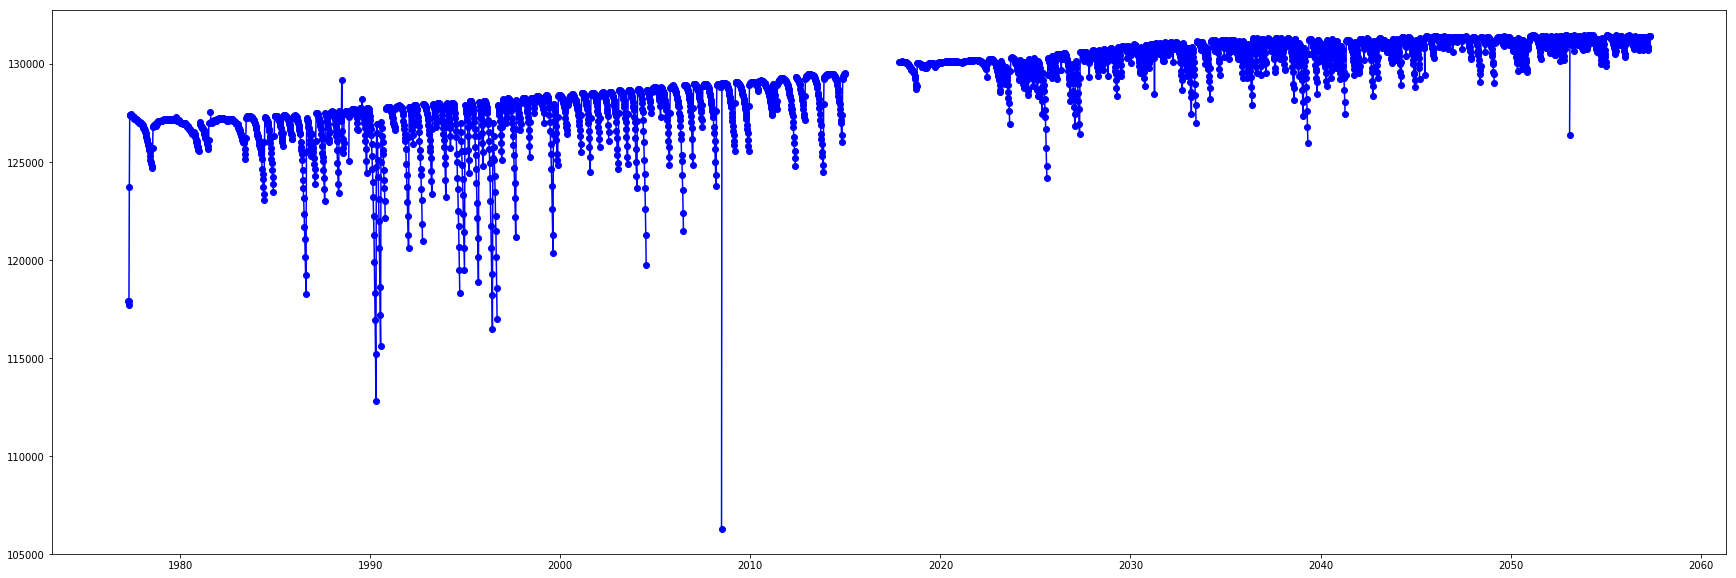

4022


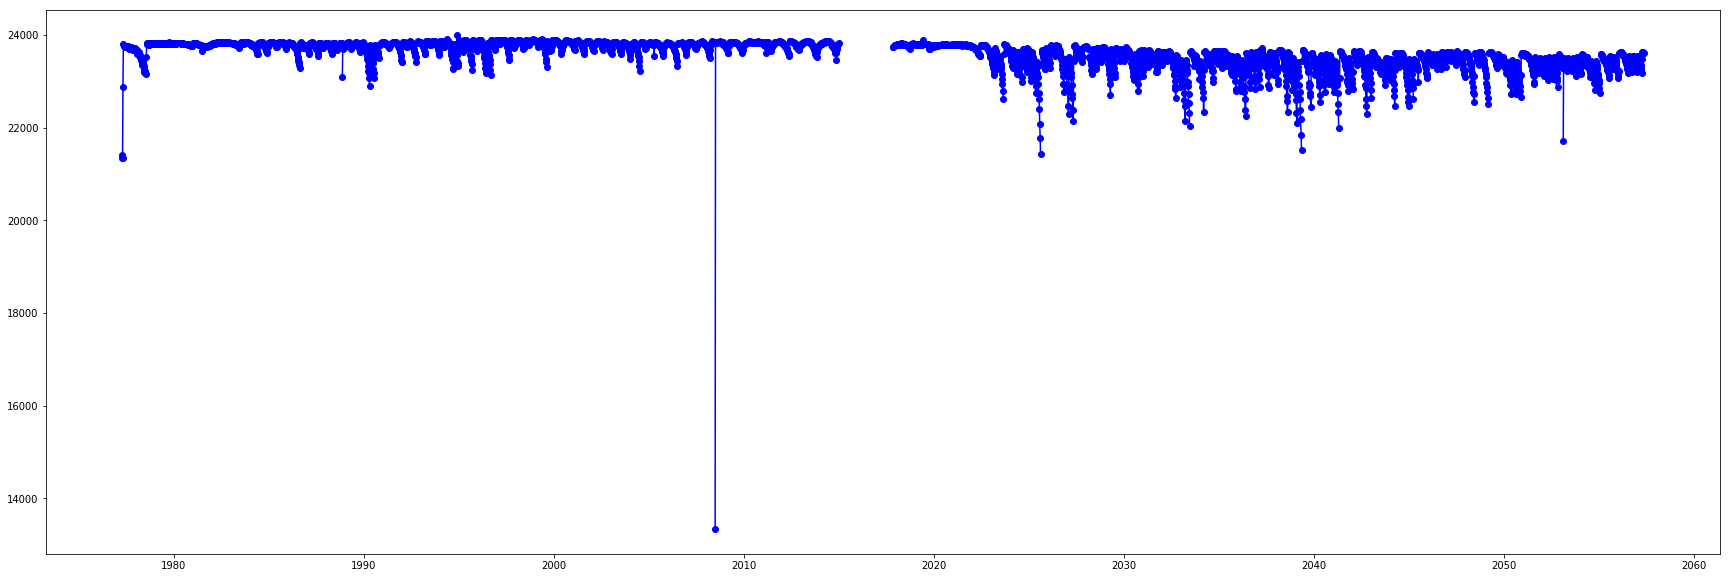

3386


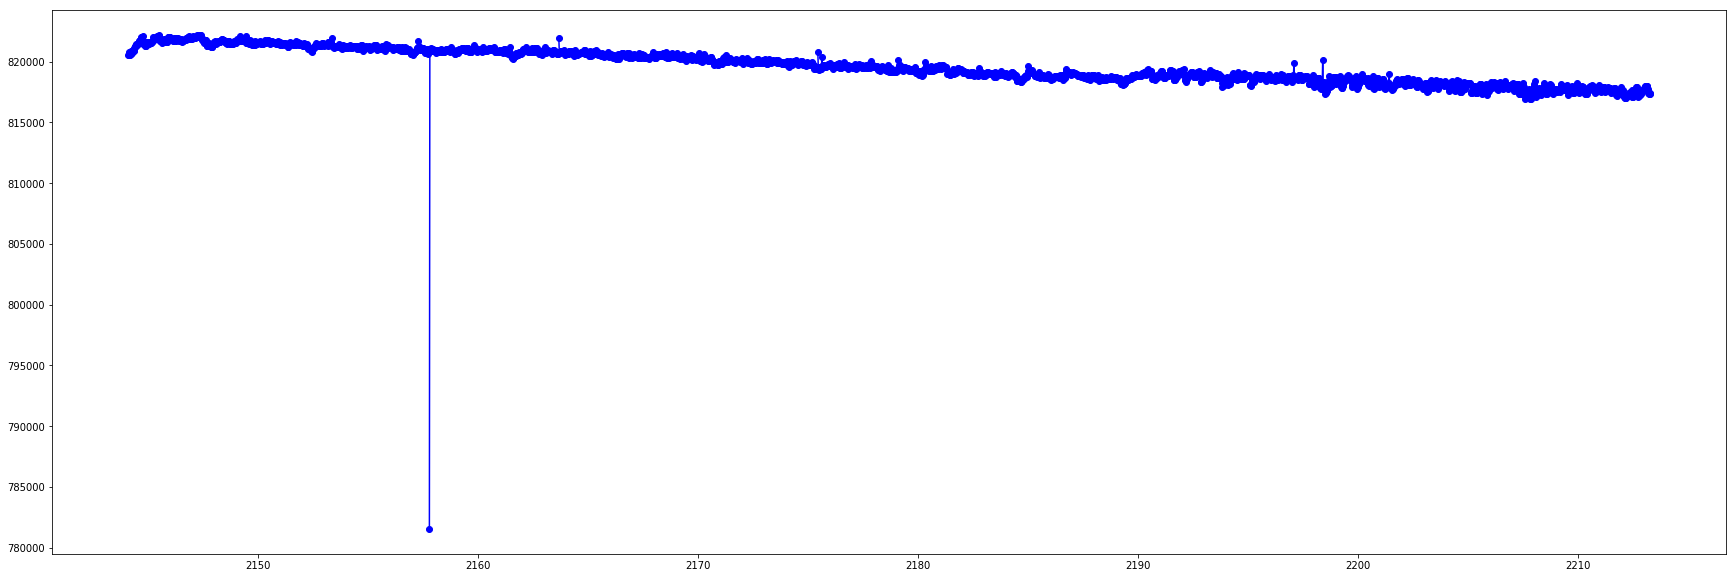

3384


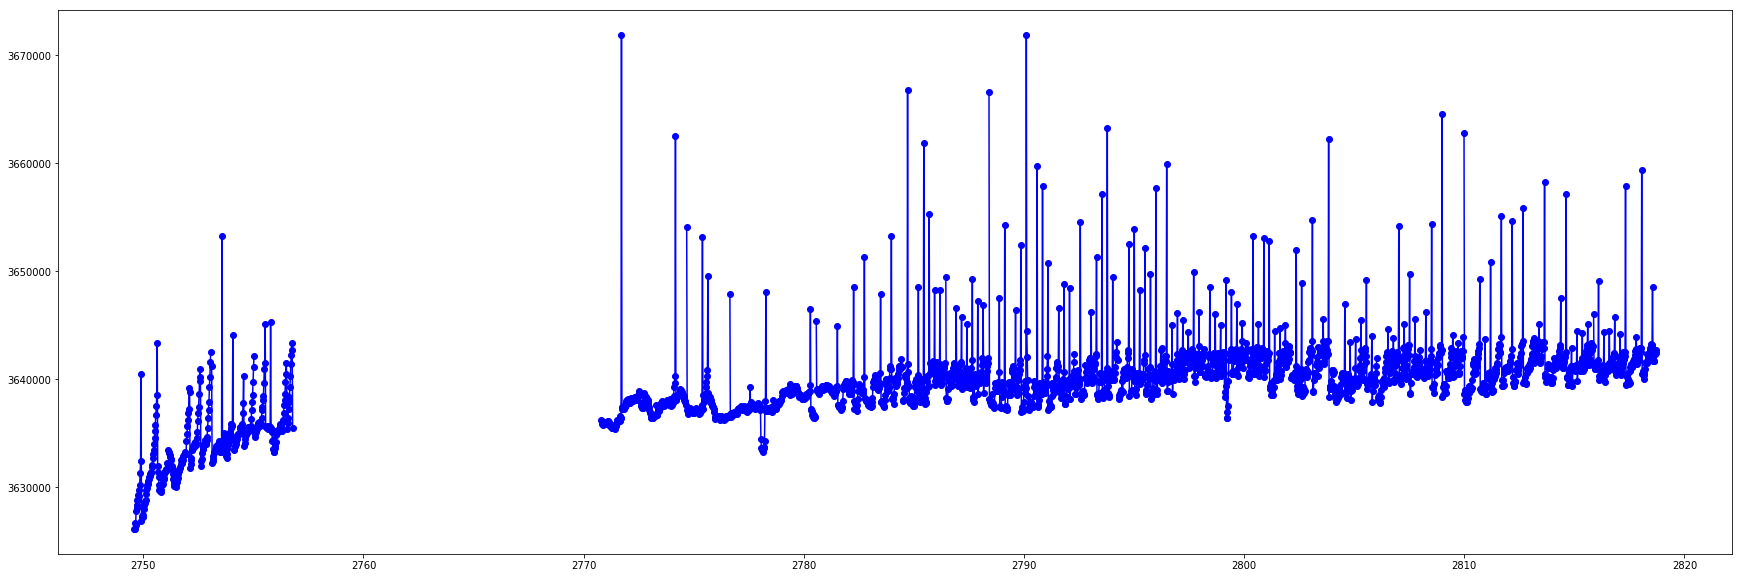

4022


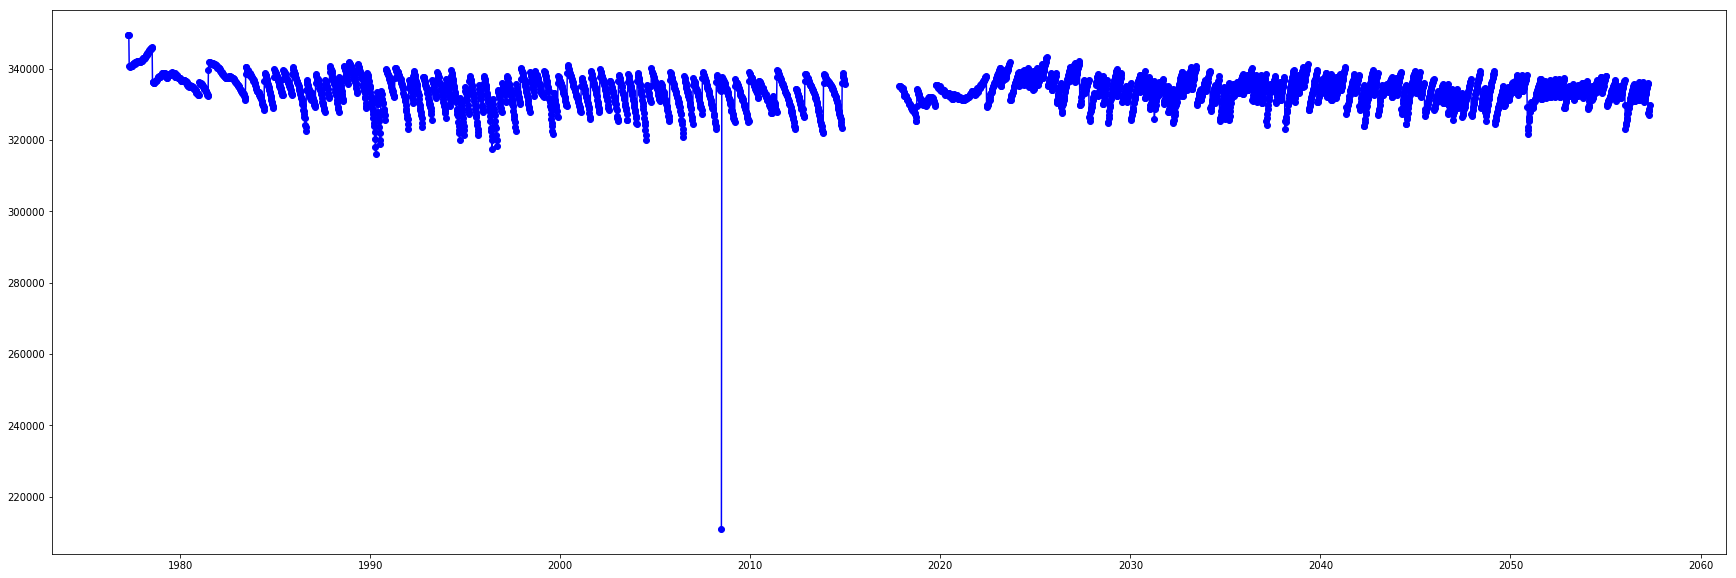

4022


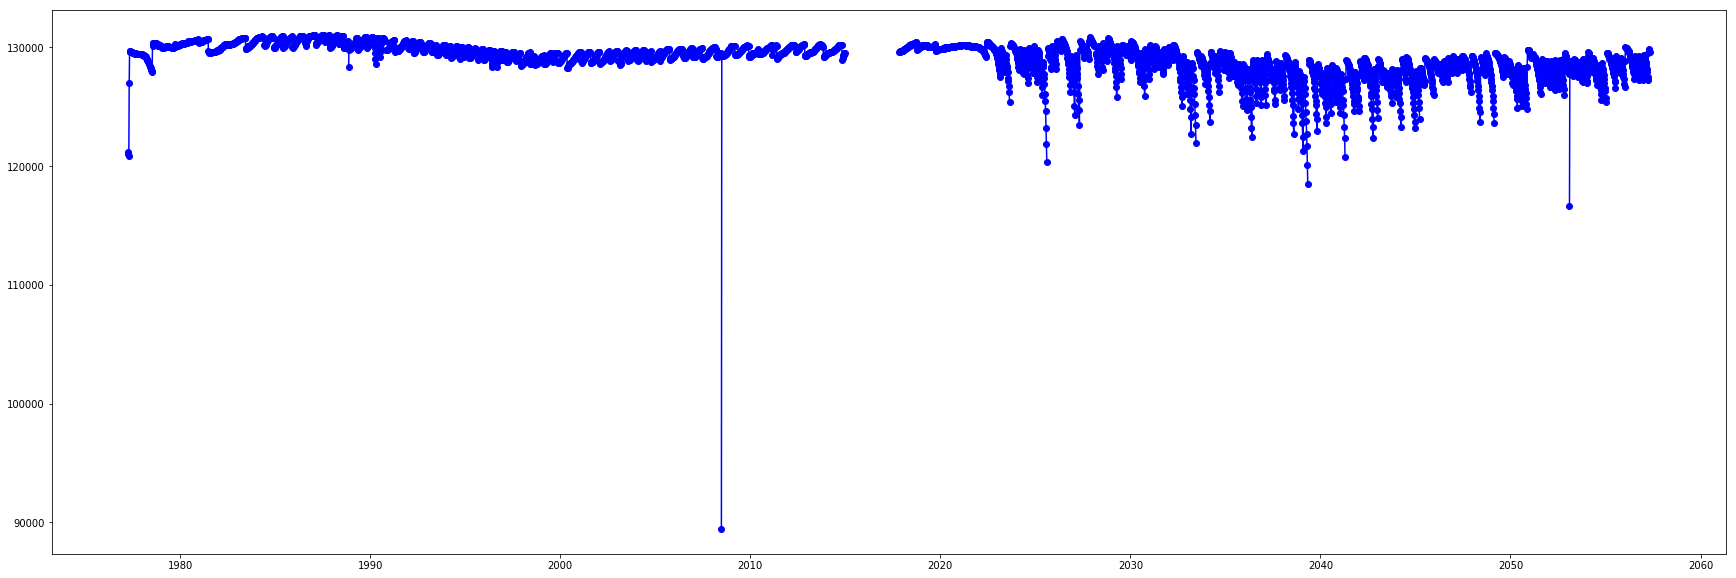

3853


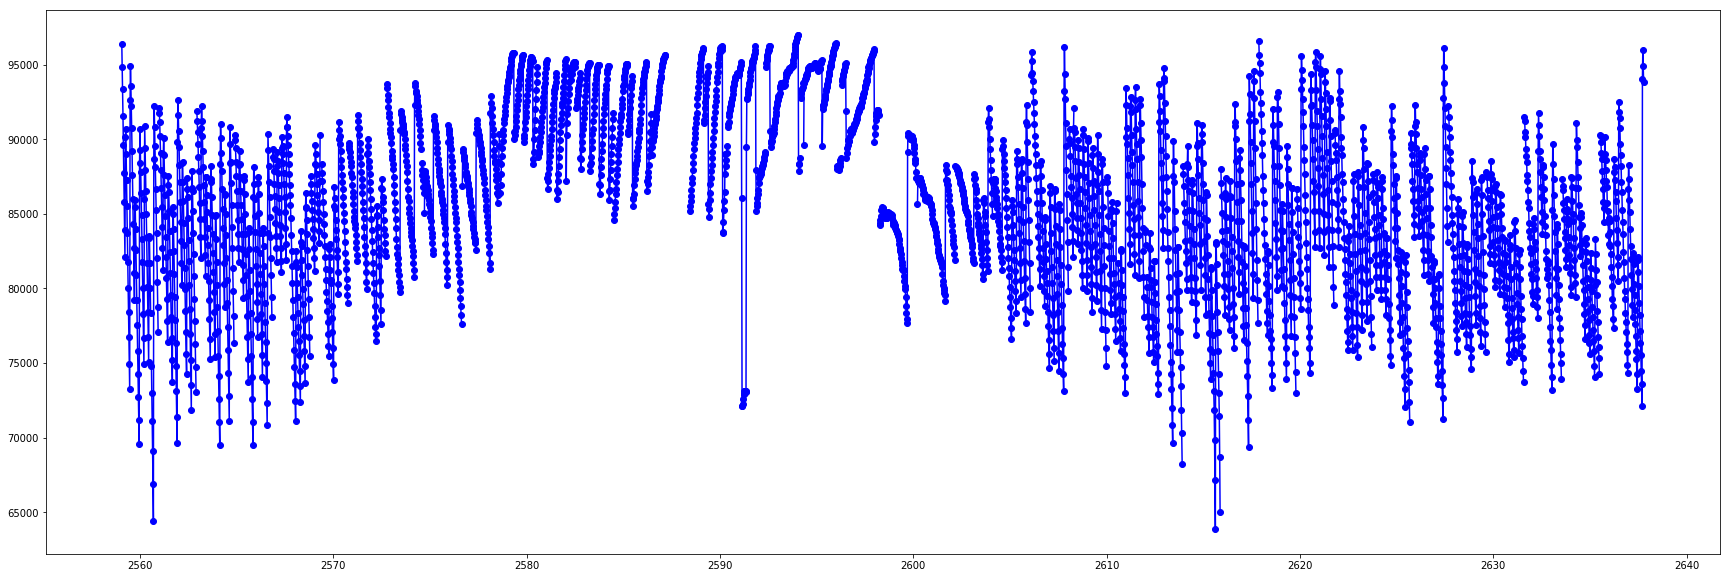

4022


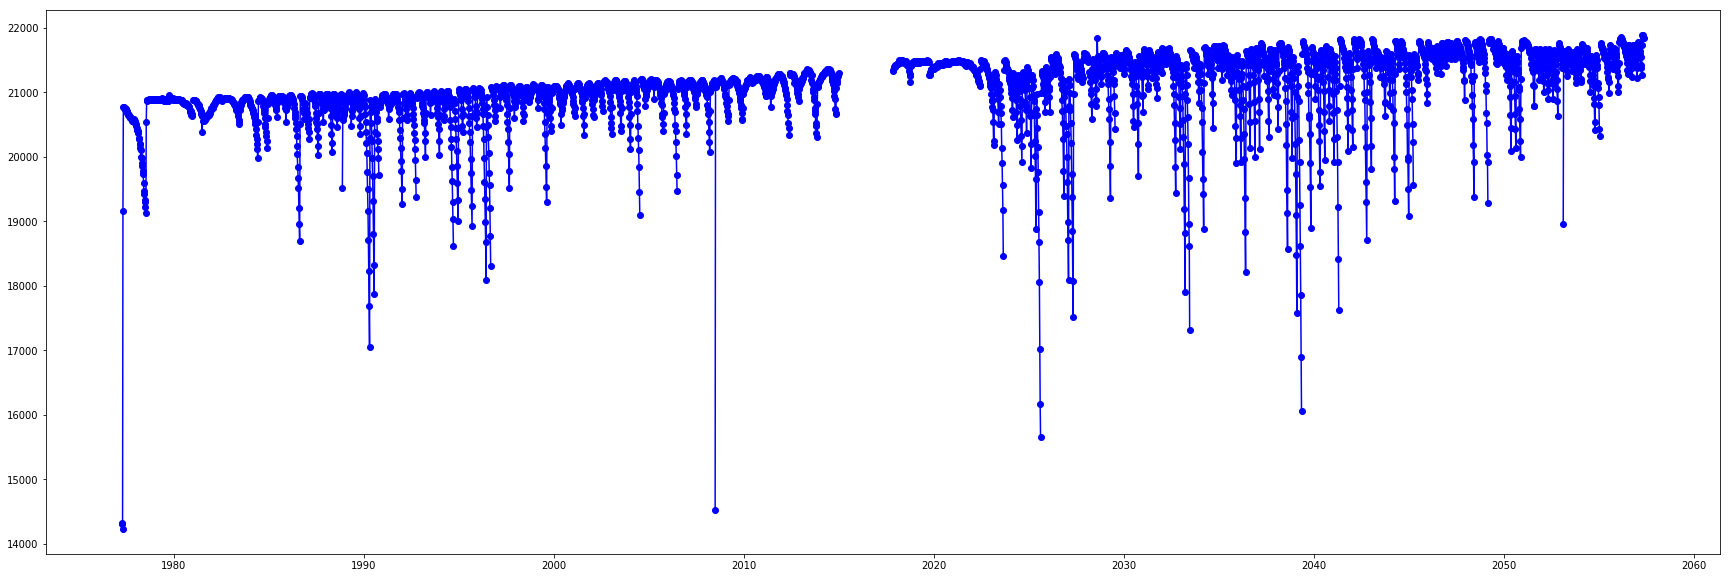

3894


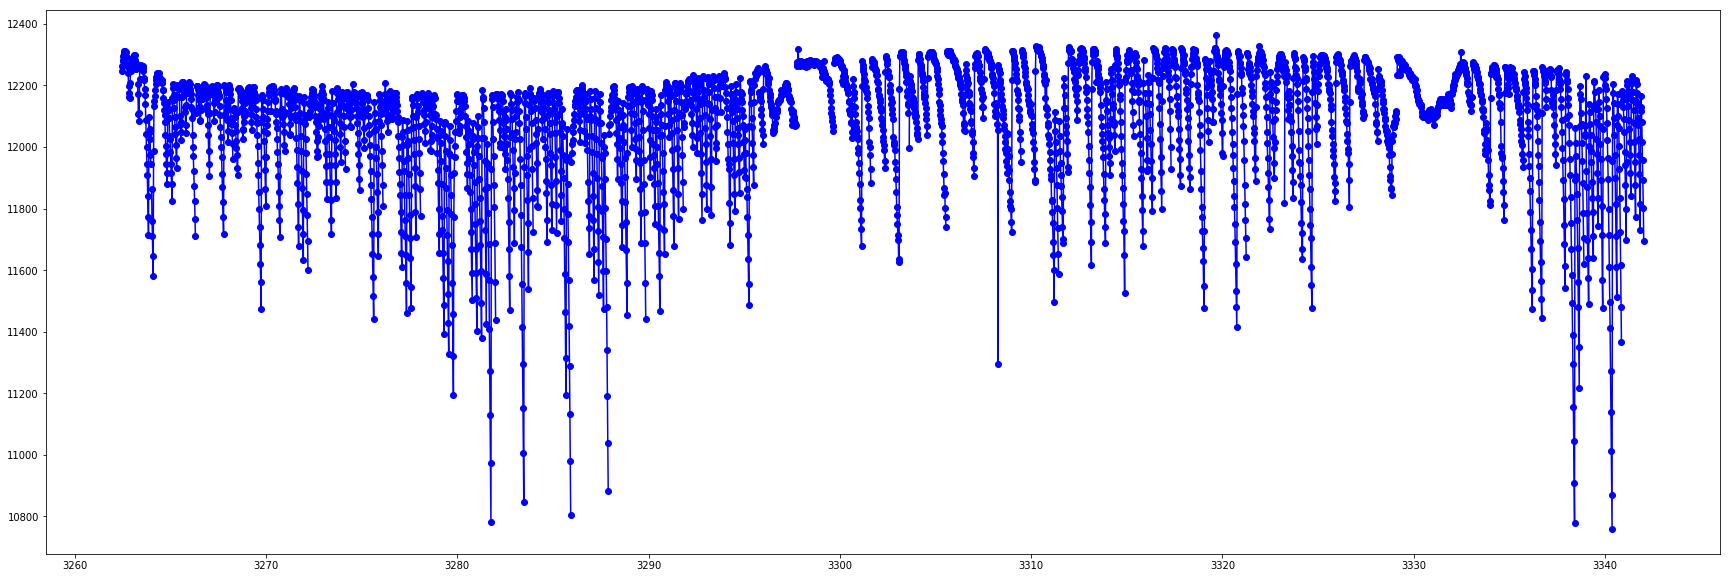

4022


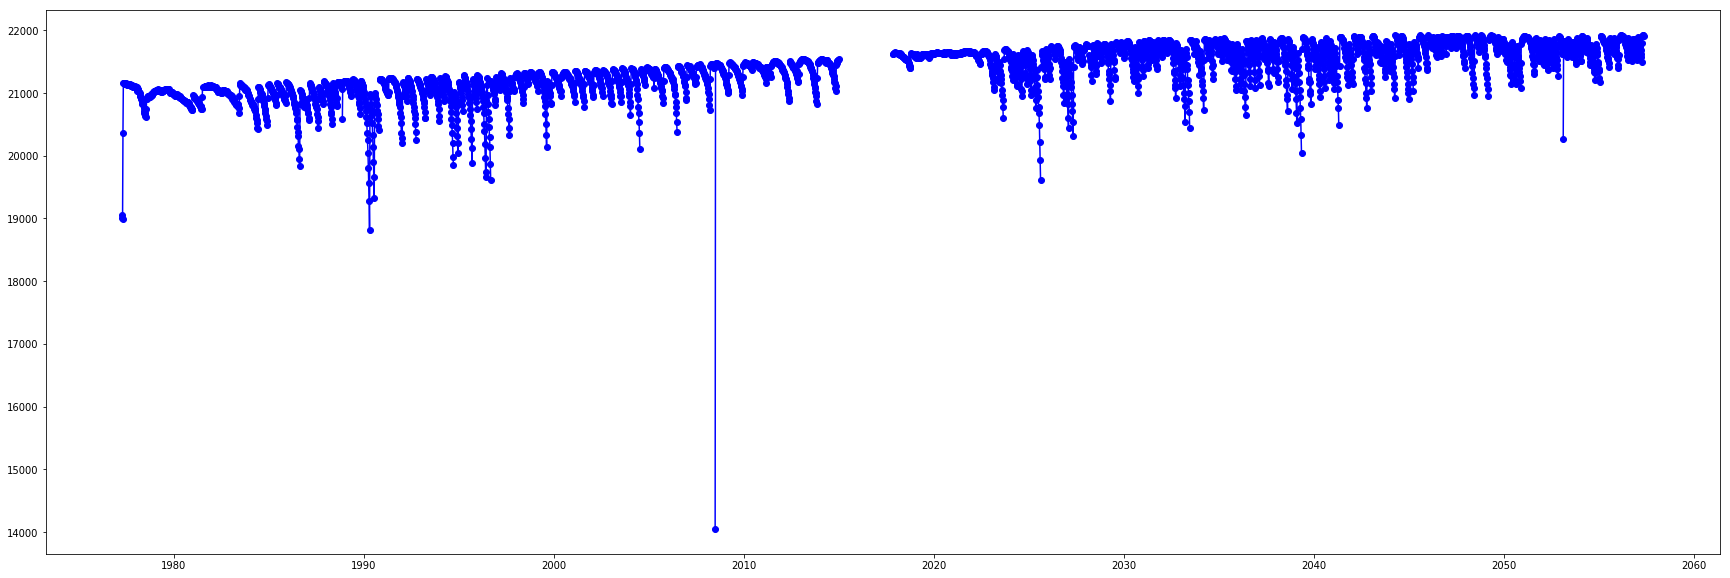

3944


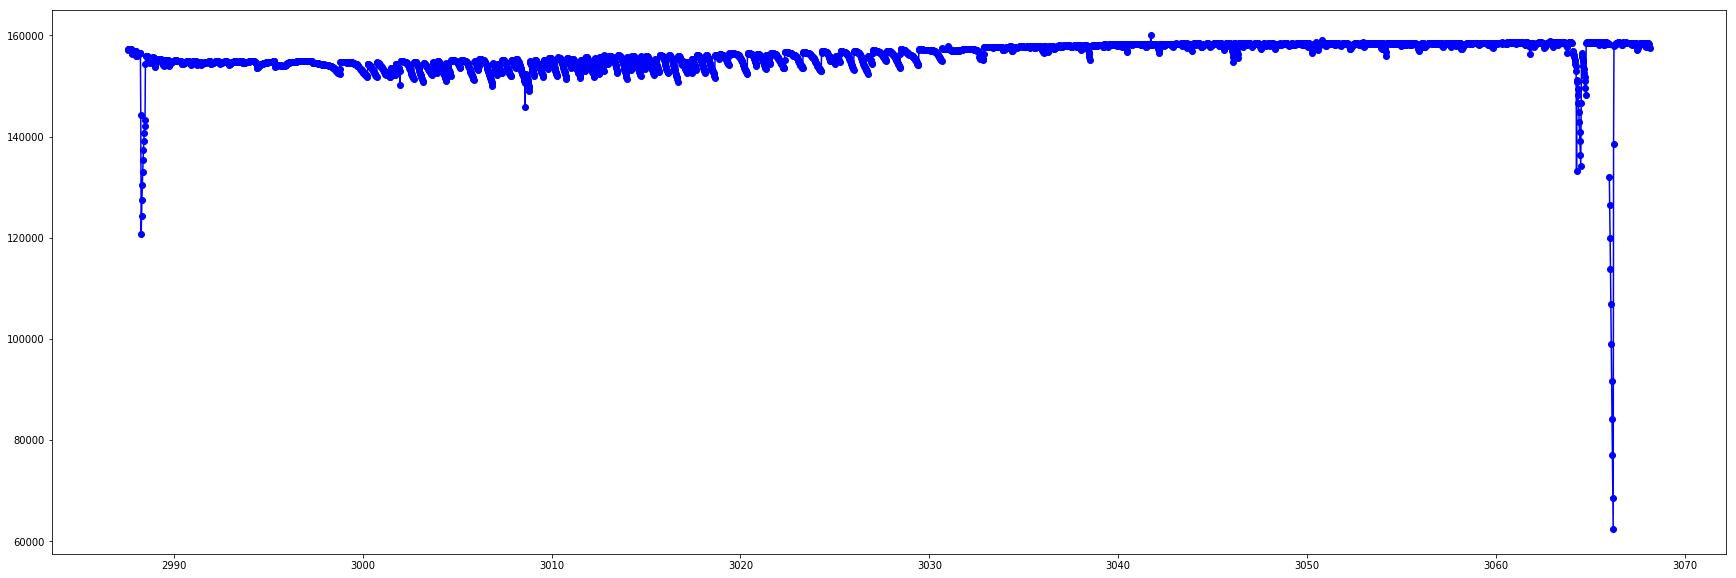

22200


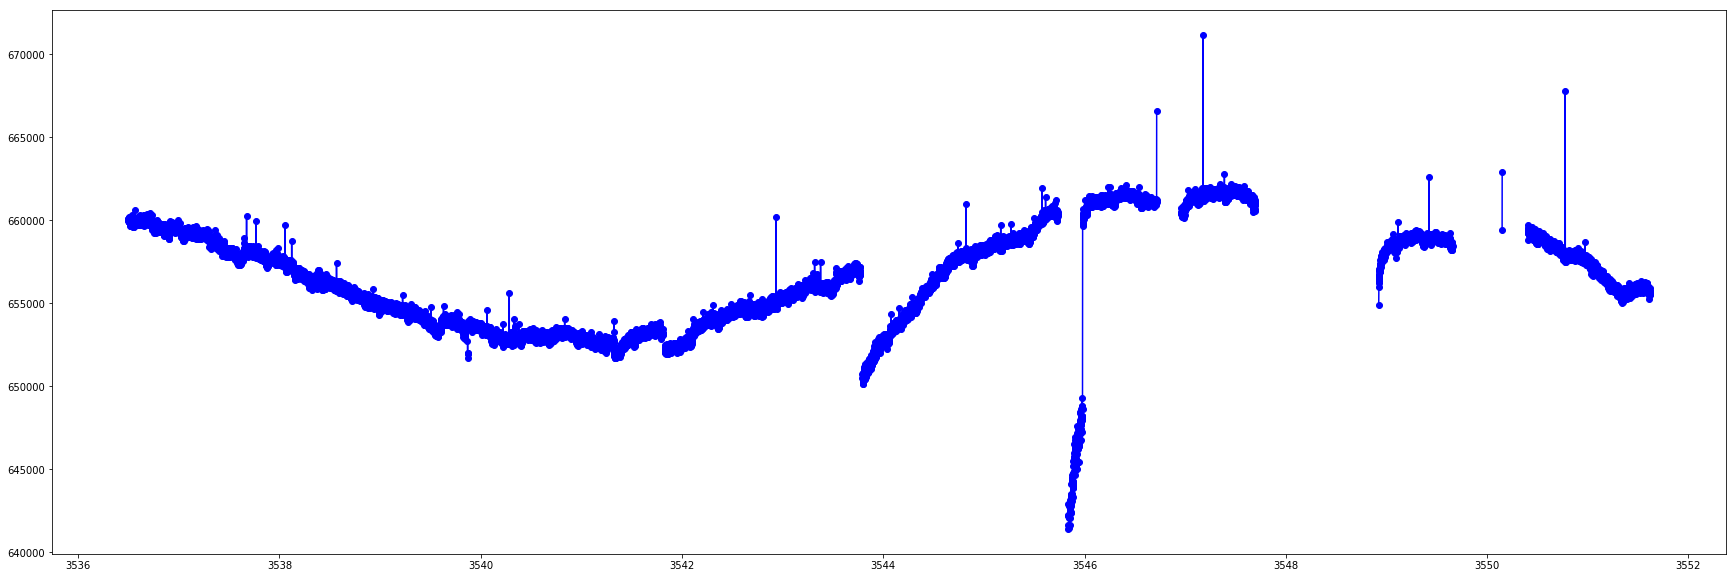

740


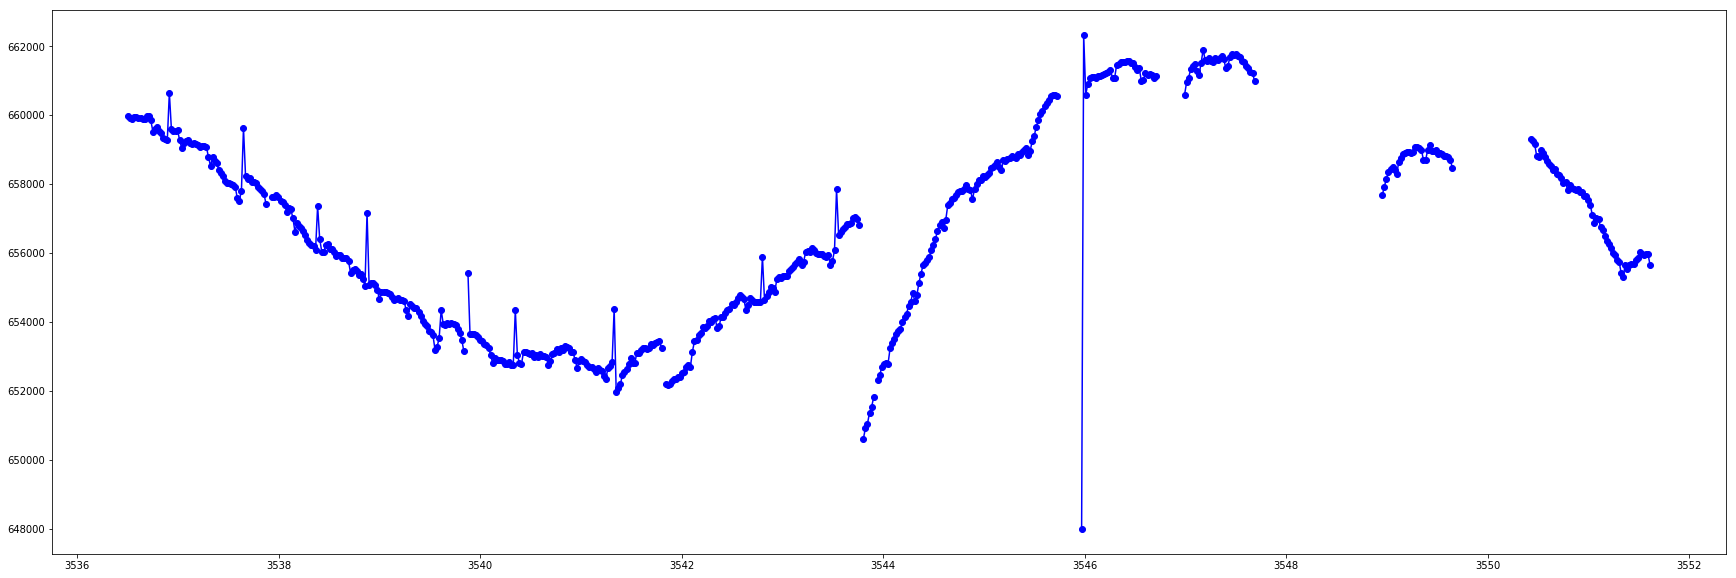

3862


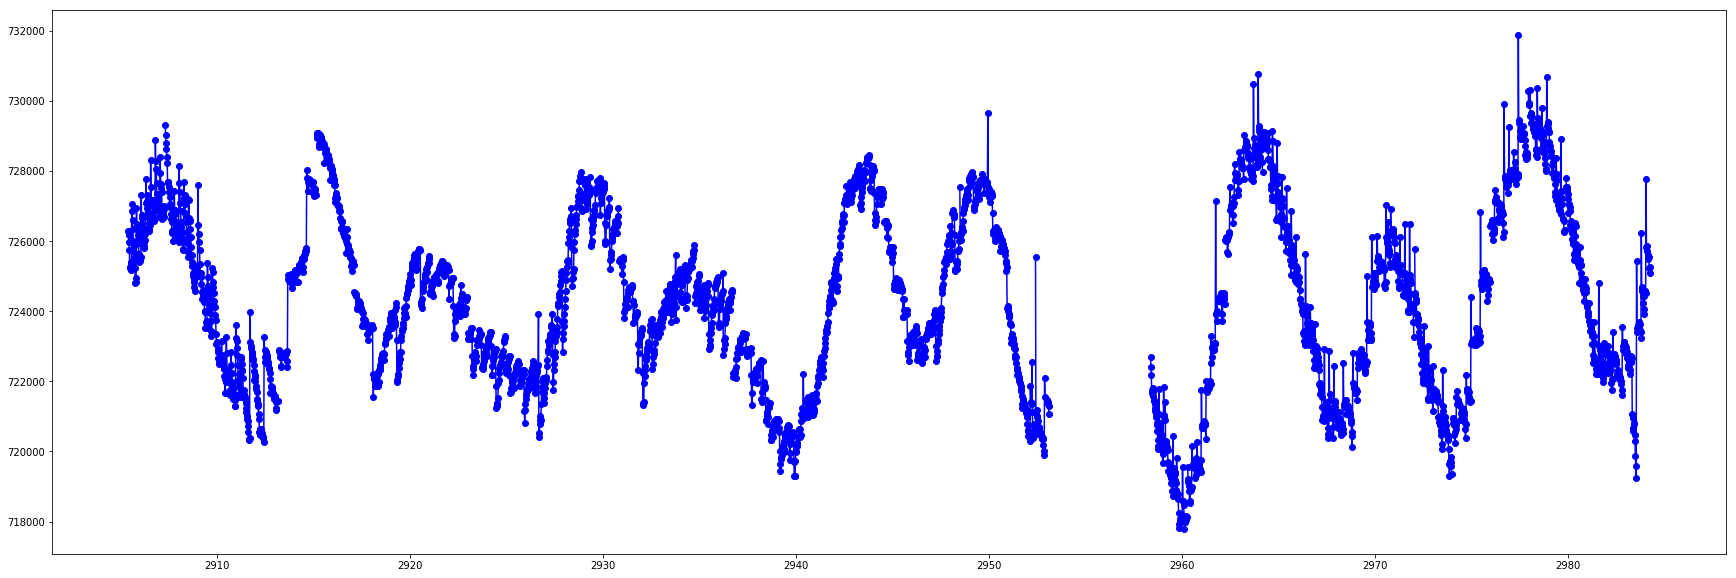

4022


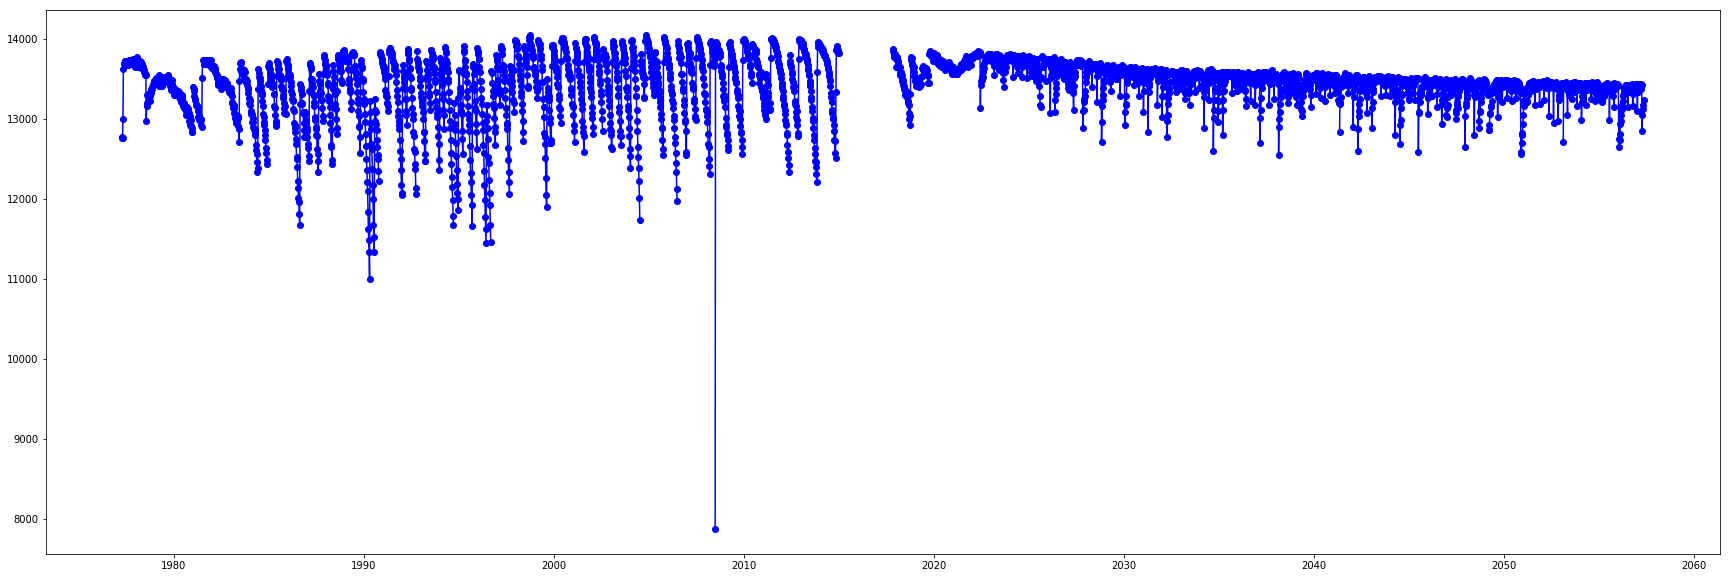

74700


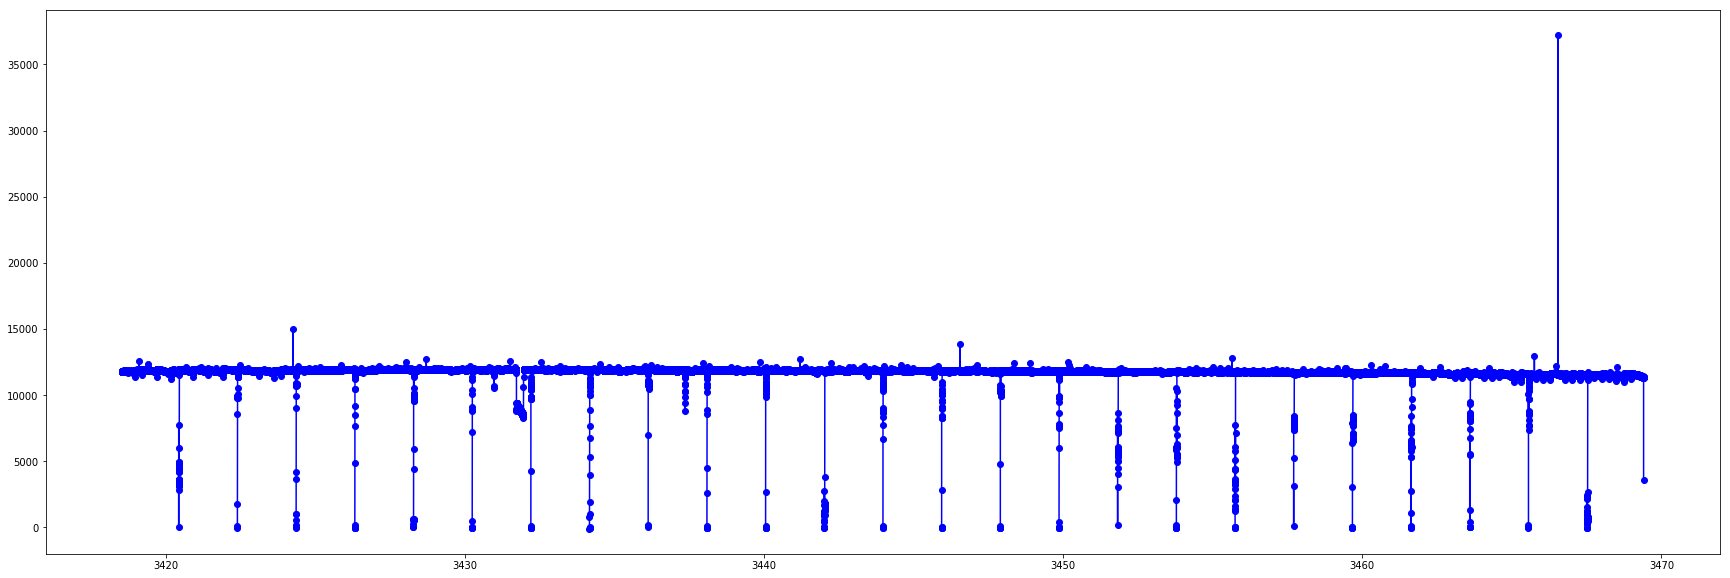

4022


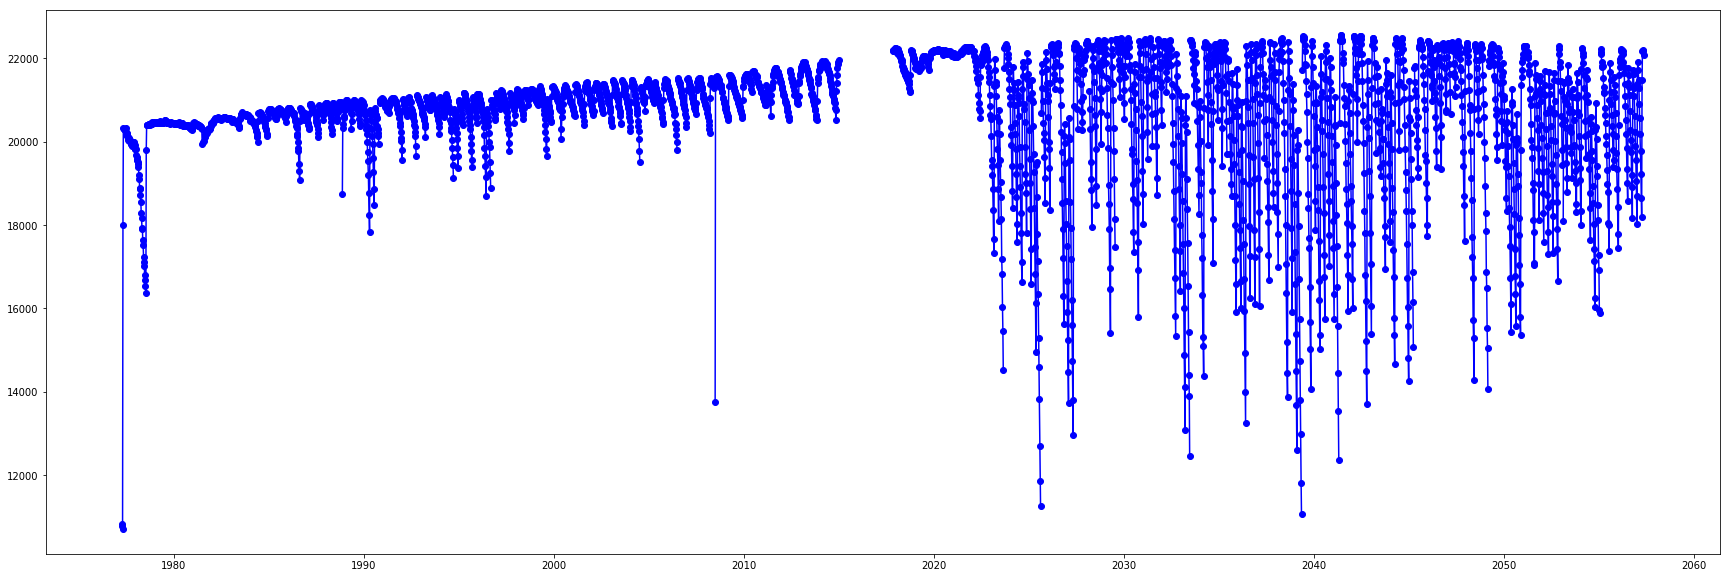

4022


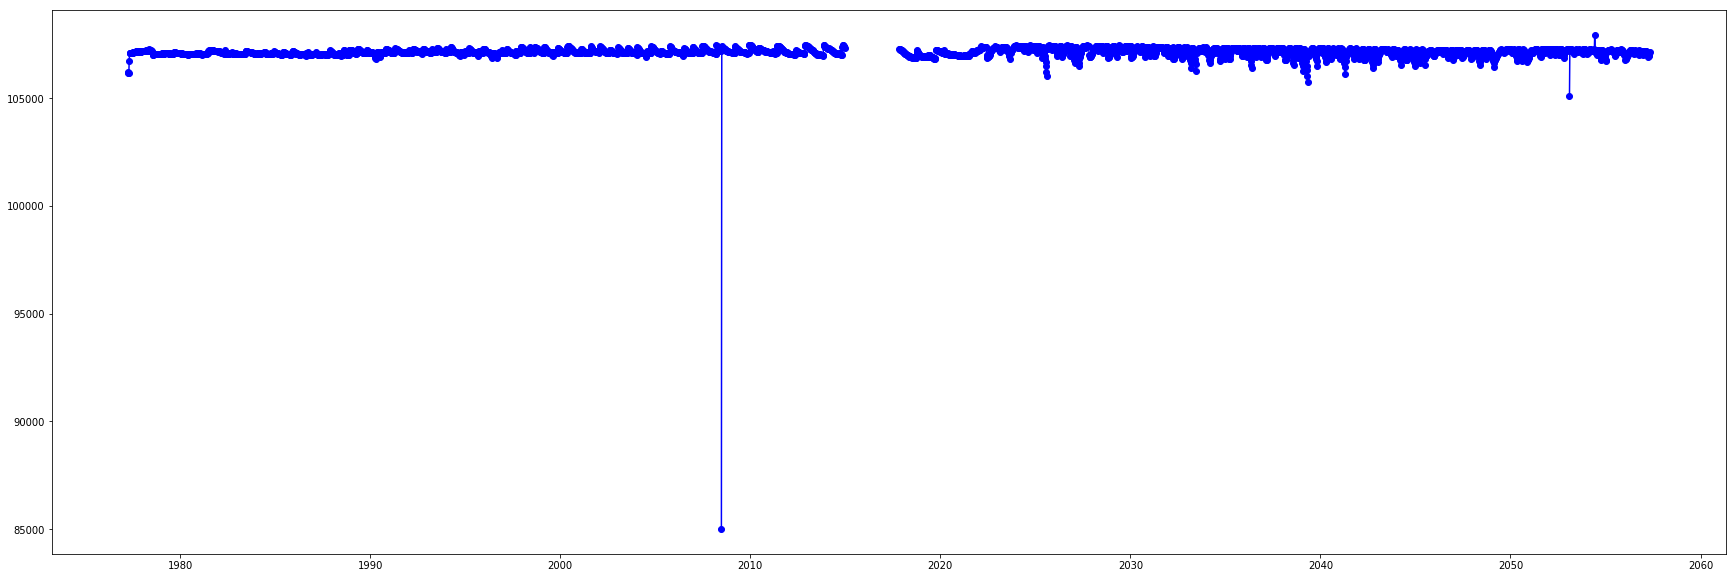

In [23]:
path_list = generate_path_list('./K2_Mission/','fits')
for value in path_list:
    hdulist = fits.open(value)
    data = hdulist[1].data

    time = data.field('TIME')
    lc_init = data.field("SAP_FLUX") #flux by seconds
    lc_error = data.field("SAP_FLUX_ERR")

    #PDCSAP_FLUX
    print(len(time))
    plt.figure(figsize=(30,10))
    plt.plot(time, lc_init,'bo-')
    plt.show()


In [15]:
from astropy.time import TimeDelta
sample_rate = [ TimeDelta(time[i+1] -time[i], format='jd', scale='tai') for i in range(time.shape[0]-1) if not np.isnan(time[i+1] -time[i]) ]
sample_rate = [value.sec/60 for value in sample_rate] #in minutes

print("Sample rate (in min): ", np.median(sample_rate))
sample_rate

Sample rate (in min):  29.42177471704781


[29.42273243330419,
 29.42273243330419,
 29.422731081722304,
 29.422874422743917,
 29.42258574999869,
 29.422729070065543,
 29.422872411087155,
 29.422727739438415,
 29.42258238676004,
 29.42286972887814,
 29.422725727781653,
 29.42258037510328,
 29.42286771722138,
 29.422722375020385,
 29.422866365639493,
 29.422577703371644,
 29.422720363363624,
 29.422863683430478,
 29.422575691714883,
 29.422718351706862,
 29.422717000124976,
 29.422717010602355,
 29.4227163400501,
 29.422714988468215,
 29.422714998945594,
 29.422857658937573,
 29.422568975714967,
 29.42271231673658,
 29.422855636803433,
 29.42256630398333,
 29.422710305079818,
 29.422852965071797,
 29.422564952401444,
 29.422707622870803,
 29.422850942937657,
 29.422706281766295,
 29.42270561121404,
 29.422704270109534,
 29.422704259632155,
 29.422702929005027,
 29.422702247975394,
 29.42270158790052,
 29.422844918444753,
 29.422556245699525,
 29.42269956576638,
 29.42284290678799,
 29.42255355301313,
 29.422697564586997,
 29.4228